In [4]:
##Importamos librerias 

import pandas as pd
import numpy as np
from scipy.stats import shapiro, levene
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [5]:
df = pd.read_csv('marketing_AB.csv', index_col=0)
df.head()


,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [6]:
df.shape

(588101, 6)

In [7]:
df.tail()

,user id,test group,converted,total ads,most ads day,most ads hour
588096,1278437,ad,False,1,Tuesday,23
588097,1327975,ad,False,1,Tuesday,23
588098,1038442,ad,False,3,Tuesday,23
588099,1496395,ad,False,1,Tuesday,23
588100,1237779,ad,False,1,Tuesday,23


In [8]:
df['test group'].unique()

array(['ad', 'psa'], dtype=object)

In [10]:
df['converted'].unique()

array([False,  True])

In [11]:
df['converted'].value_counts()

converted
False    573258
True      14843
Name: count, dtype: int64

In [9]:
df.groupby('test group')['converted'].mean()

test group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64

In [15]:
df['test group'].value_counts()

test group
ad     564577
psa     23524
Name: count, dtype: int64

<Axes: xlabel='test group', ylabel='Count'>

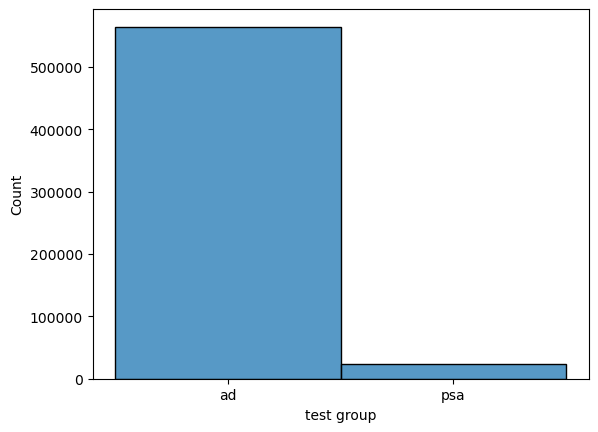

In [14]:
sns.histplot(x= 'test group', data=df)

In [ ]:
sns.countplot(x='Test')

In [40]:
## hacemos una tabla de contingencia:

contingency_table = pd.crosstab(df['test group'], df['converted'], normalize=True)*100 # para pasar a porcentaje
contingency_table 

converted,False,True
test group,,
ad,93.547537,2.452470
psa,3.928577,0.071416


In [42]:
tabla_contingencia = pd.crosstab(df['test group'], df['converted'])
tabla_contingencia

converted,False,True
test group,,
ad,550154,14423
psa,23104,420


In [ ]:
## Es un problema de porcentajes, por lo que usamos el Chi: 

In [43]:
chi2_contingency(tabla_contingencia)

Chi2ContingencyResult(statistic=54.005823883685245, pvalue=1.9989623063390075e-13, dof=1, expected_freq=array([[550327.71899045,  14249.28100955],
       [ 22930.28100955,    593.71899045]]))

In [44]:
_, p_value, _, _ = chi2_contingency (tabla_contingencia)

print(p_value)

1.9989623063390075e-13


In [45]:
p_value < 0.05

True

In [ ]:
# Existe una diferencia significativa en la tasa de conversión entre los grupos de prueba "ad" y "psa".

In [ ]:

#contingency_table = pd.crosstab(df['test group'], df['converted']) / df.shape[0]
#contingency_table 

converted,False,True
test group,,
ad,0.935475,0.024525
psa,0.039286,0.000714
